In [1]:
# Note; the following assumptions was made based on Black Scholes model

# 1) Europian options can only be exercised at expiration date;
# 2) No dididend was paid out during the option life
# 3) Risk free rate and Vol was constant
# 4)Follows a lognomal distribution 


In [2]:
import pathlib
import math   as m
import numpy  as np
import pandas as pd


input_dir = pathlib.Path('InputFolder_Assig')

In [3]:
from scipy.stats import norm

In [4]:
call_data = pd.read_csv( input_dir / 'CallOptionData.csv', na_filter = False) # This is done to get the data from the CSV file.
call_data

,TradeID,Rate,Maturity,Strike,Spot,Vol
0,Trade1-Equity-Call-Option,0.02,0.25,120,100,0.2


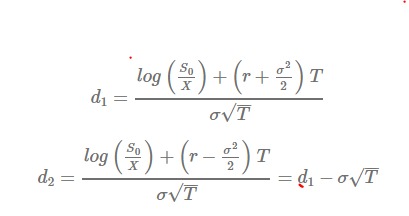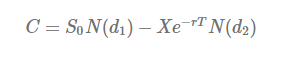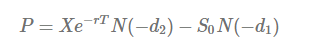

Black scholes formula, Call option formula, Put option formula

In [5]:
#S, underlining stock price at t=0, also known as spot price

#K: strike price

#T: time to maturity or expiry,the maturity of the option. Defined as T−t

#r: the risk-free interest rate, assumed to be constant between t and T

#sigma also known as vol: volatility of underlining stock,the standard deviation of the asset returns

S=100
K=120
T=.25
r=0.02
sigma=0.2

In [6]:

def black_scholes_call( S, K, T, r, sigma):
    
# first we have to calculate d1 and d2 parameters from black scholes formula

    d1 = (m.log(S/K)
          +(r+sigma*sigma/2.0)*T)/(sigma*m.sqrt(T))
    
    d2 = d1 - sigma * m.sqrt(T)
    
    
# then we return the call option formular above.
    
    call_option = S*norm.cdf(d1)-norm.cdf(d2)*K*m.exp(-r*T)
    return call_option
    
    
def black_scholes_put( S, K, T, r, sigma):
    
# first we have to calculate d1 and d2 parameters from black scholes formula

    d1 = (m.log(S/K)
          +(r+sigma*sigma/2.0)*T)/(sigma*m.sqrt(T))
    
    d2 = d1 - sigma * m.sqrt(T)
    
    
# then we return the call option formular above.
    
    Put_option = -S*norm.cdf(-d1)+norm.cdf(-d2)*K*m.exp(-r*T)

    return Put_option

In [7]:
print ("call option: ", black_scholes_call(S, K, T, r, sigma))
print ("put option: ", black_scholes_put(S, K, T, r, sigma))

call option:  0.16666269433063086
put option:  19.5681601974525
